In [1]:
%pip install seaborn

You should consider upgrading via the 'c:\Users\Jarek718\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as PD
import seaborn as SNS
import matplotlib.pyplot as plt

In [3]:
file = PD.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

In [4]:
file.tail(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101746,443797298,89955270,Caucasian,Male,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,No,No,Yes,<30
101747,443804570,33230016,Caucasian,Female,[70-80),?,1,22,7,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
101748,443811536,189481478,Caucasian,Female,[40-50),?,1,4,7,14,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101749,443816024,106392411,Caucasian,Female,[70-80),?,3,6,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101750,443824292,138784172,Caucasian,Female,[80-90),?,3,1,1,3,...,No,Down,No,No,No,No,No,Ch,Yes,<30
101751,443835140,175326800,Caucasian,Male,[70-80),?,3,6,1,13,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101752,443835512,139605341,Other,Female,[40-50),?,3,1,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101753,443841992,184875899,Other,Male,[40-50),?,1,1,7,13,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30


In [5]:
list(file)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [6]:
#Getting the important cloumns, not all of them may be used but these are the one I believe to be the most relavent to my goal 
RelevantInfo = file[['encounter_id','patient_nbr','race','gender','age','weight','time_in_hospital','insulin','change','diabetesMed','readmitted']]

In [7]:
#Removing Entries without a race given
RelevantInfoChart1 = RelevantInfo.loc[~RelevantInfo["race"].str.contains("Other")]

In [8]:
#Had to remove the "?" but not ? throws an error, all the other ones cotain "a"
RelevantInfoChart1 = RelevantInfoChart1.loc[RelevantInfoChart1["race"].str.contains("a")]

In [14]:
# Doing a double group by for first race than inslin
GroupbyRace = RelevantInfoChart1[['encounter_id','race', 'insulin']].groupby(['race', 'insulin'])

In [15]:
#counting the above group by
GroupbyRaceCount = GroupbyRace.count()
GroupbyRaceCount

encounter_id
race            insulin              
AfricanAmerican Down             2445
                No               8024
                Steady           6555
                Up               2186
Asian           Down               69
                No                333
                Steady            156
                Up                 83
Caucasian       Down             9011
                No              36600
                Steady          22223
                Up               8265
Hispanic        Down              253
                No                934
                Steady            584
                Up                266

<AxesSubplot:xlabel='race,insulin'>

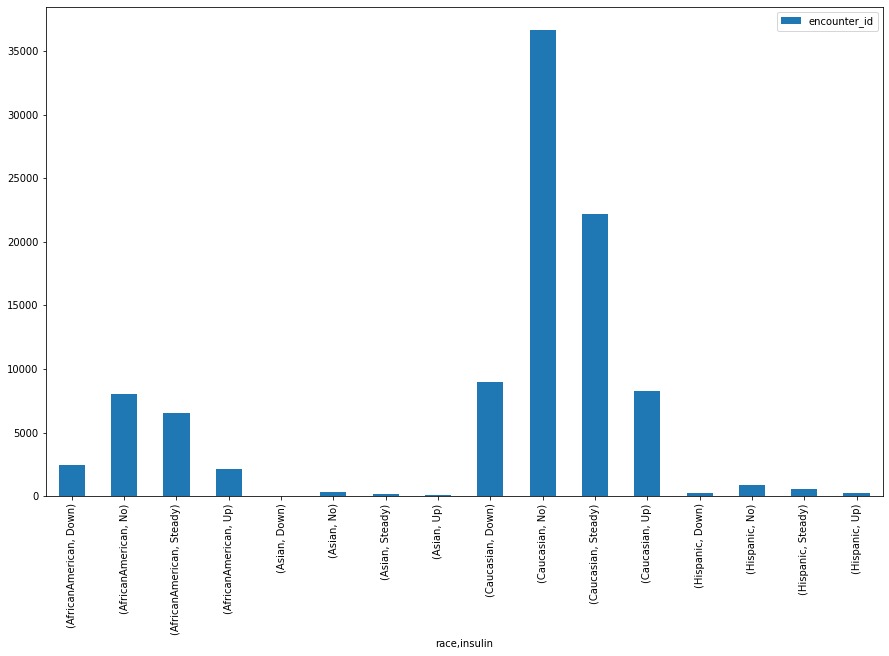

In [19]:
# I don't like the mono-color for the bars here so I'm going for minor change
GroupbyRaceCount.plot(kind="bar",figsize=(15,9))

In [21]:
# Since they are group this is also not relavent
GroupbyRaceCount.describe()

,encounter_id
count,16.00000
mean,6124.18750
std,10008.14198
min,69.00000
25%,262.75000
50%,1560.00000
75%,8084.25000
max,36600.00000


In [17]:
#This will un-group that data so that it can be counted and shown separatly
GroupbyRaceUnstacked = GroupbyRace.size().unstack(level=1)
GroupbyRaceUnstacked

insulin,Down,No,Steady,Up
race,,,,
AfricanAmerican,2445,8024,6555,2186
Asian,69,333,156,83
Caucasian,9011,36600,22223,8265
Hispanic,253,934,584,266


<AxesSubplot:xlabel='race'>

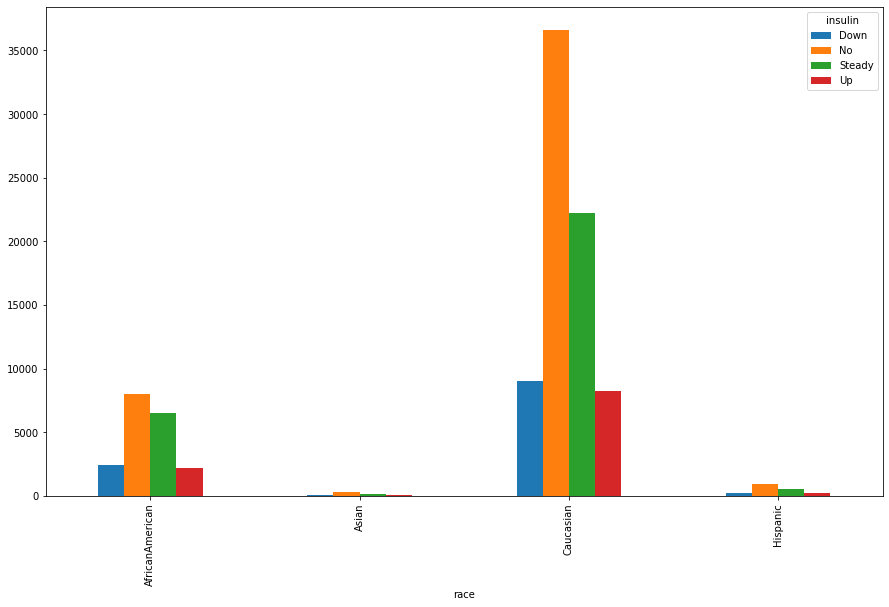

In [18]:
# This graph is easier to read due to the mixed colors
GroupbyRaceUnstacked.plot(kind="bar",figsize=(15,9))

In [20]:
GroupbyRaceUnstacked.describe()

insulin,Down,No,Steady,Up
count,4.000000,4.000000,4.00000,4.000000
mean,2944.500000,11472.750000,7379.50000,2700.000000
std,4185.872868,17111.709935,10317.73659,3829.989817
min,69.000000,333.000000,156.00000,83.000000
25%,207.000000,783.750000,477.00000,220.250000
50%,1349.000000,4479.000000,3569.50000,1226.000000
75%,4086.500000,15168.000000,10472.00000,3705.750000
max,9011.000000,36600.000000,22223.00000,8265.000000


## Results

- This bar graph shows that among all groups No insulin is given the majority of the time.
- Next it shows that when given insulin the majority of the time the doeage is not changed
- Lastly even though Down and Up doesage are about even lowring the doesage always take priority

In [23]:
#Now lest take a look at people's likelyhood of spending time at the hospital by age
GroupbyAge = RelevantInfo[['patient_nbr','age', 'time_in_hospital']].groupby(['age', 'time_in_hospital'])

In [39]:
#There is too much that so this will not show much
GroupbyAge.count()

patient_nbr
age      time_in_hospital             
[0-10)   1                          33
         2                          53
         3                          48
         4                          16
         5                           6
...                                ...
[90-100) 10                         71
         11                         59
         12                         38
         13                         28
         14                         27

[134 rows x 1 columns]

In [25]:
#This is a better distribution of data to look at
GroupbyAgeUnstacked = GroupbyAge.size().unstack(level=1)
GroupbyAgeUnstacked

time_in_hospital,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,,,,,,,,,,,,,,
[0-10),33.0,53.0,48.0,16.0,6.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
[10-20),143.0,225.0,145.0,63.0,28.0,19.0,14.0,13.0,6.0,10.0,6.0,5.0,7.0,7.0
[20-30),284.0,403.0,348.0,233.0,122.0,75.0,48.0,35.0,26.0,36.0,19.0,12.0,6.0,10.0
[30-40),607.0,866.0,743.0,476.0,330.0,203.0,161.0,114.0,76.0,65.0,48.0,34.0,33.0,19.0
[40-50),1645.0,1949.0,1690.0,1219.0,841.0,628.0,510.0,363.0,226.0,167.0,145.0,119.0,101.0,82.0
[50-60),2951.0,3112.0,2997.0,2325.0,1553.0,1157.0,894.0,641.0,461.0,361.0,254.0,223.0,172.0,155.0
[60-70),3306.0,3821.0,3837.0,2983.0,2185.0,1622.0,1295.0,1012.0,648.0,554.0,414.0,314.0,265.0,227.0
[70-80),3318.0,4041.0,4398.0,3645.0,2704.0,2038.0,1586.0,1231.0,858.0,645.0,545.0,414.0,362.0,283.0
[80-90),1676.0,2411.0,3022.0,2498.0,1875.0,1543.0,1163.0,851.0,603.0,433.0,365.0,289.0,236.0,232.0


<AxesSubplot:xlabel='age'>

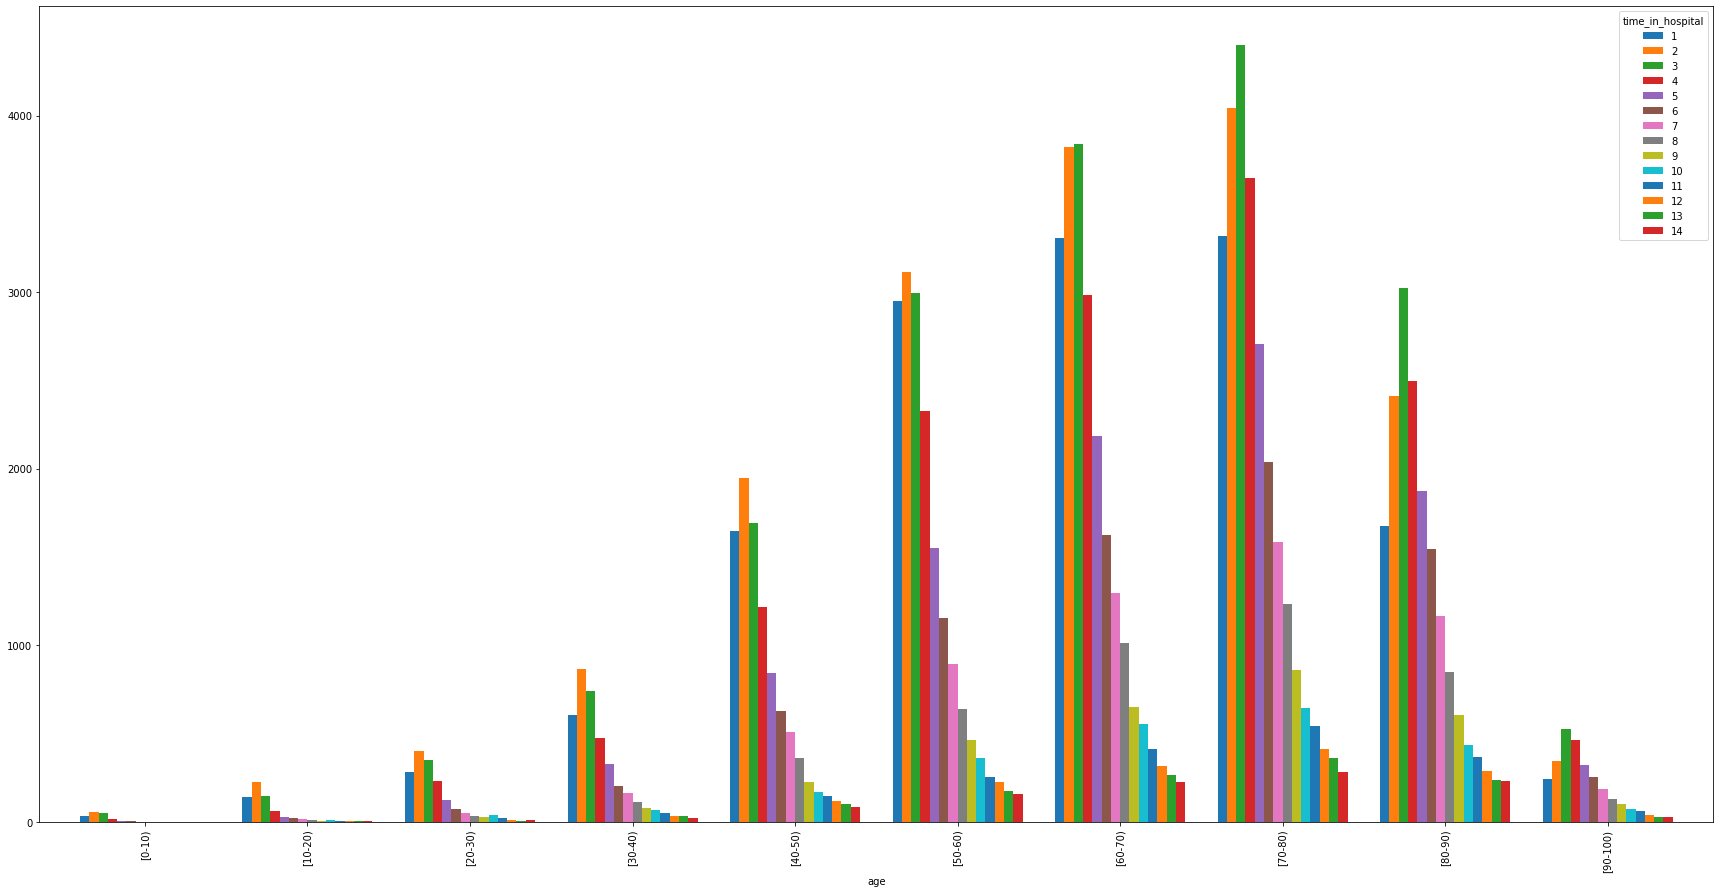

In [37]:
# I had to edit the size of the graph more and edit the size of each bar to make it more clear to interpret
GroupbyAgeUnstacked.plot(kind="bar",figsize=(30,15), width=0.8)

In [38]:
GroupbyAgeUnstacked.describe()

time_in_hospital,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1420.800000,1722.400000,1775.600000,1392.400000,996.600000,753.900000,585.90000,439.100000,333.555556,260.222222,206.111111,160.888889,134.444444,115.777778
std,1354.256811,1550.720922,1649.352681,1351.146525,1000.928924,769.181592,599.53027,460.622634,315.838610,242.348292,197.177867,152.972583,130.398534,109.994065
min,33.000000,53.000000,48.000000,16.000000,6.000000,3.000000,1.00000,1.000000,6.000000,10.000000,6.000000,5.000000,6.000000,7.000000
25%,254.750000,358.000000,393.000000,291.250000,172.000000,107.000000,76.25000,54.750000,76.000000,65.000000,48.000000,34.000000,28.000000,19.000000
50%,1126.000000,1407.500000,1216.500000,847.500000,585.500000,439.500000,348.50000,246.500000,226.000000,167.000000,145.000000,119.000000,101.000000,82.000000
75%,2632.250000,2936.750000,3015.750000,2454.750000,1794.500000,1446.500000,1095.75000,798.500000,603.000000,433.000000,365.000000,289.000000,236.000000,227.000000
max,3318.000000,4041.000000,4398.000000,3645.000000,2704.000000,2038.000000,1586.00000,1231.000000,858.000000,645.000000,545.000000,414.000000,362.000000,283.000000


## Results

- This shows that the age range 70-80 spends the most time in the hospital
- This also shows that the younger you are the less likely you are to spend more than 2 days in the hospital
- At the age range of 60-70 you are almost equally likely to spend 2 and 3 days at the Hospital
- At the age of 70 onwords you are more likely to spend 4 days than 1 day, and age 80 onwards more likely to spend 4 days than 2 days at the hospital